In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  


In [7]:
# Read data
data = pd.read_csv('shopping_trends_updated.csv')
data.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
# Get info about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
# numerical summaries
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
data.shape

(3900, 18)

In [12]:
# check if our data has any NA values
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [13]:
# check for duplicates
data.duplicated().sum()

0

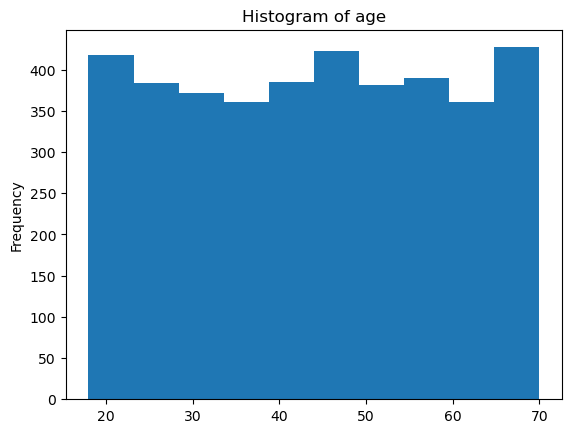

In [16]:
# plot a histogram for age
data["Age"].plot(kind="hist")
plt.title("Histogram of age")
plt.show()

In [17]:
# check the columns we have
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

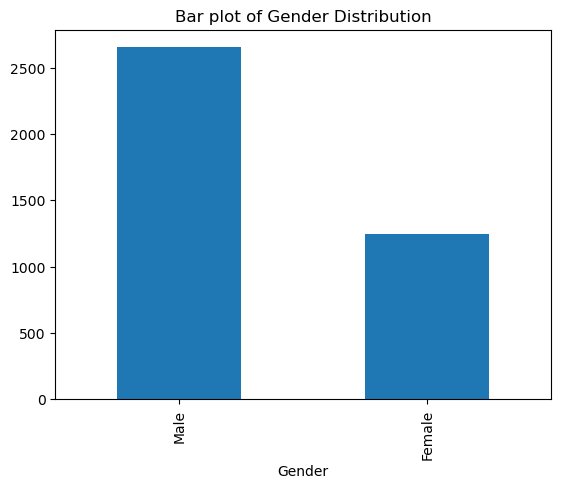

In [19]:
# bar plot
data["Gender"].value_counts().plot(kind="bar")
plt.title("Bar plot of Gender Distribution")
plt.show()

In [26]:
# Group by categories
data.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False).tail(3)

Category
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [29]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
776,777,49,Male,Shirt,Clothing,60,Alabama,M,Maroon,Spring,5.0,Yes,Standard,Yes,Yes,8,Venmo,Every 3 Months
1664,1665,19,Male,Handbag,Accessories,53,Minnesota,M,Purple,Spring,5.0,No,Next Day Air,Yes,Yes,35,PayPal,Weekly
1277,1278,19,Male,Blouse,Clothing,97,Rhode Island,L,Green,Spring,5.0,No,Express,Yes,Yes,5,Venmo,Quarterly
2632,2633,24,Male,Scarf,Accessories,27,Alaska,M,Black,Fall,5.0,No,Next Day Air,No,No,14,Cash,Annually
965,966,43,Male,Boots,Footwear,55,Delaware,L,Black,Spring,5.0,Yes,Store Pickup,Yes,Yes,10,Credit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,54,Male,Jacket,Outerwear,34,Utah,M,Maroon,Fall,2.5,No,Next Day Air,Yes,Yes,35,PayPal,Quarterly
3473,3474,63,Female,Dress,Clothing,40,Kansas,M,Cyan,Spring,2.5,No,Express,No,No,11,Cash,Weekly
1449,1450,18,Male,Socks,Clothing,41,New York,L,Lavender,Winter,2.5,No,Store Pickup,Yes,Yes,20,Cash,Every 3 Months
133,134,52,Male,Sweater,Clothing,65,Montana,M,Violet,Winter,2.5,Yes,Next Day Air,Yes,Yes,25,Venmo,Annually


In [31]:
# sort data by review rating
data.sort_values("Review Rating", ascending=False, inplace=True)

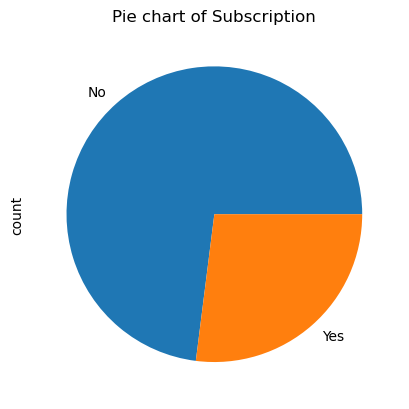

In [35]:
# Pie chart for subscription status
data["Subscription Status"].value_counts().plot(kind="pie")
plt.title("Pie chart of Subscription")
plt.show()

<Axes: ylabel='count'>

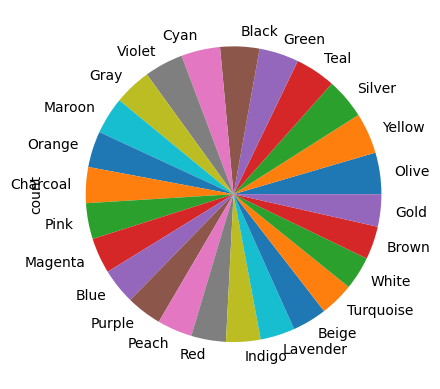

In [41]:
data["Color"].value_counts().plot(kind="pie")

Text(0.5, 1.0, 'Scatter plot - Previous Purchases and Review Rating')

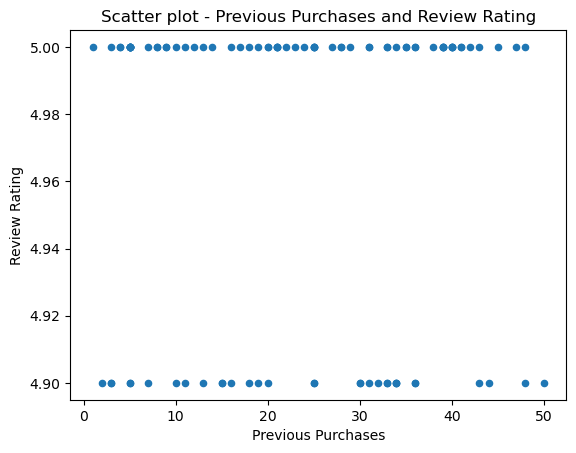

In [46]:
data.head(100).plot(x="Previous Purchases", y="Review Rating", kind="scatter")
plt.title("Scatter plot - Previous Purchases and Review Rating")

In [47]:
data.groupby("Season")["Purchase Amount (USD)"].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

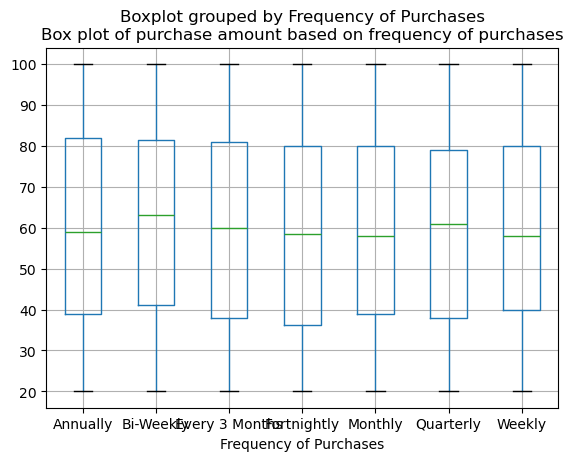

In [49]:
data.boxplot(column="Purchase Amount (USD)", by="Frequency of Purchases")
plt.title("Box plot of purchase amount based on frequency of purchases")
plt.show()

In [53]:
data["Payment Method"].value_counts().sort_values(ascending=False)

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [56]:
# create a pivot table using the pandas pivot_table function
# the pivot table is designed to summarize the mean purchase amount ("Purchase Amount (USD)") for each item ("Item Purchased") across different locations ("Location")
pd.pivot_table(data, values="Purchase Amount (USD)", index="Location", columns="Item Purchased", aggfunc="mean").head()

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


In [57]:
data.groupby("Size")["Purchase Amount (USD)"].mean()

Size
L     58.563153
M     59.924217
S     61.037707
XL    60.090909
Name: Purchase Amount (USD), dtype: float64

In [58]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum()

Payment Method
Bank Transfer    36544
Cash             40002
Credit Card      40310
Debit Card       38742
PayPal           40109
Venmo            37374
Name: Purchase Amount (USD), dtype: int64

In [61]:
data.groupby("Discount Applied")["Review Rating"].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

In [62]:
data.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [63]:
data.groupby("Frequency of Purchases")["Previous Purchases"].median()

Frequency of Purchases
Annually          24.0
Bi-Weekly         24.0
Every 3 Months    24.0
Fortnightly       26.0
Monthly           25.0
Quarterly         28.0
Weekly            26.0
Name: Previous Purchases, dtype: float64

In [65]:
data.groupby("Season")["Review Rating"].mean()

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

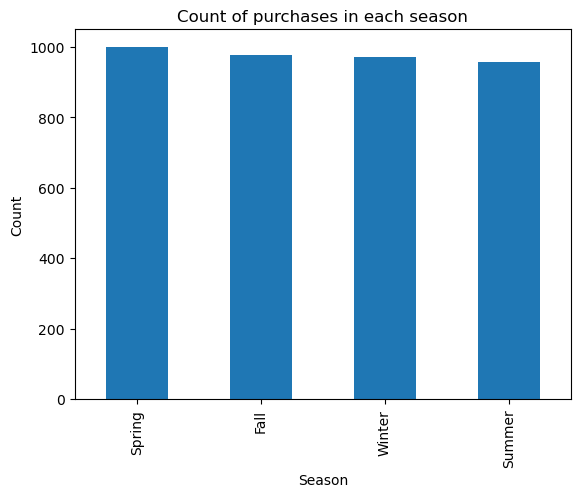

In [66]:
data["Season"].value_counts().plot(kind="bar")
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Count of purchases in each season")
plt.show()


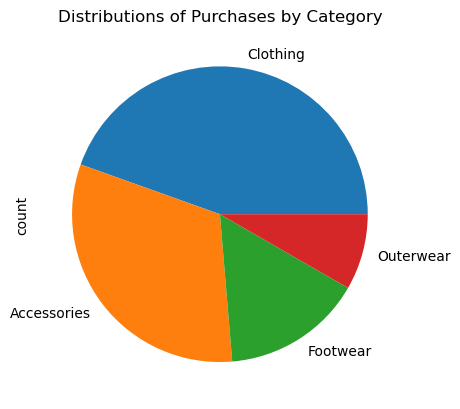

In [67]:
data["Category"].value_counts().plot(kind="pie")
plt.title("Distributions of Purchases by Category")
plt.show()

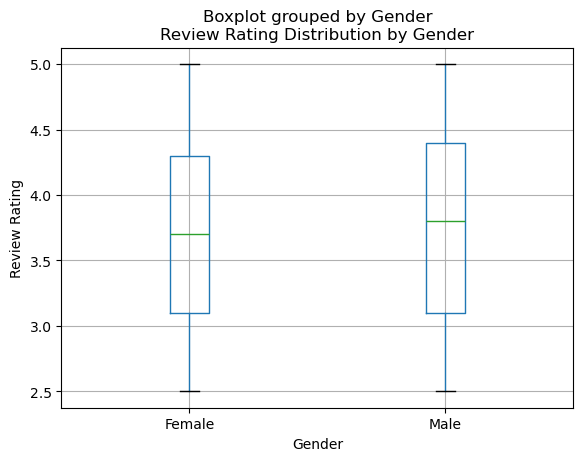

In [69]:
data.boxplot(column="Review Rating", by="Gender")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.title("Review Rating Distribution by Gender")
plt.show()


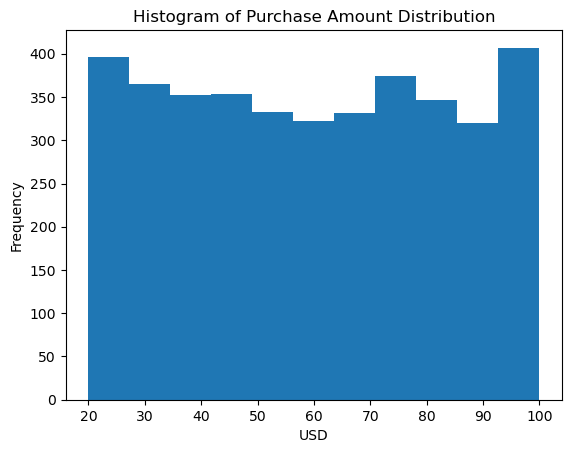

In [71]:
data["Purchase Amount (USD)"].plot(kind="hist", bins=11)
plt.xlabel("USD")
plt.ylabel("Frequency")
plt.title("Histogram of Purchase Amount Distribution")
plt.show()

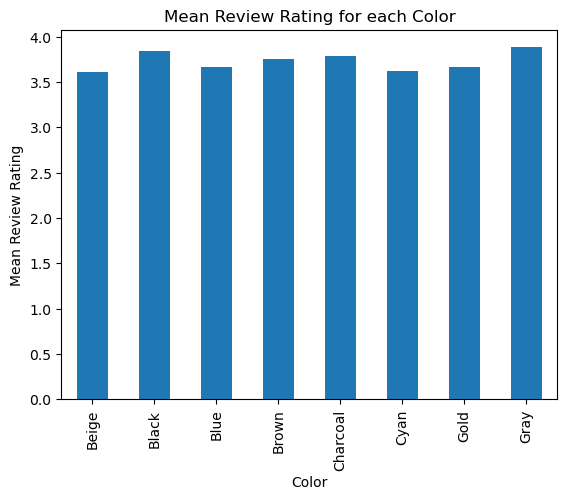

In [75]:
data.groupby("Color")["Review Rating"].mean().head(8).plot(kind="bar")
plt.xlabel("Color")
plt.ylabel("Mean Review Rating")
plt.title("Mean Review Rating for each Color")
plt.show()